In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("online_store_sales.csv", parse_dates=["Order Date", "Ship Date"], dayfirst=True)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
col_names = [ col.strip().lower().replace(' ', '_').replace('-', '_') for col in df.columns ]

df.columns = col_names

df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales'],
      dtype='object')

In [4]:
grouped_df = df.groupby('category')

In [5]:
grouped_df.groups


{'Furniture': [0, 1, 3, 5, 10, 23, 24, 27, 29, 36, 38, 39, 51, 52, 57, 65, 66, 72, 73, 76, 78, 85, 93, 96, 104, 110, 117, 119, 124, 125, 128, 129, 139, 140, 146, 149, 157, 167, 173, 177, 189, 192, 201, 204, 213, 222, 226, 228, 229, 231, 232, 234, 238, 239, 241, 242, 244, 249, 254, 272, 282, 292, 293, 294, 295, 301, 303, 304, 309, 310, 311, 313, 317, 325, 328, 338, 354, 362, 364, 369, 377, 384, 387, 399, 408, 412, 413, 415, 417, 422, 424, 425, 439, 440, 444, 446, 453, 456, 457, 462, ...], 'Office Supplies': [2, 4, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 25, 28, 30, 31, 32, 33, 34, 37, 42, 43, 45, 46, 49, 50, 53, 55, 56, 58, 60, 61, 63, 64, 67, 69, 70, 71, 74, 75, 77, 79, 80, 81, 82, 83, 84, 87, 88, 89, 91, 92, 94, 95, 97, 98, 99, 101, 102, 105, 108, 111, 112, 113, 114, 115, 116, 118, 120, 121, 122, 126, 127, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 150, 151, 153, 154, 155, 156, 158, 160, 162, 163, 164, ...], 'Technology': [7, 11, 19, 26, 35, 40, 41, 44, 

### Get unique group keys

In [7]:
grouped_df.groups.keys()

dict_keys(['Furniture', 'Office Supplies', 'Technology'])

### Filter data on the basis of group keys

In [9]:
# Selecting a group

grouped_df.get_group("Technology")

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152
11,12,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424
19,20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480
26,27,CA-2017-121755,2017-01-16,2017-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049.0,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570
35,36,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9780,9781,CA-2017-153178,2017-09-14,2017-09-18,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Long Beach,New York,11561.0,East,TEC-PH-10001944,Technology,Phones,Wi-Ex zBoost YX540 Cellular Phone Signal Booster,437.850
9789,9790,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,39.992
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376


### Returning first row, last row and nth row for each group


In [11]:
grouped_df.first()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,sub_category,product_name,sales
category,,,,,,,,,,,,,,,,,
Furniture,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.960
Office Supplies,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620
Technology,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Phones,Mitel 5320 IP Phone VoIP phone,907.152


In [12]:
grouped_df.last()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,sub_category,product_name,sales
category,,,,,,,,,,,,,,,,,
Furniture,9793,CA-2015-127166,2015-05-21,2015-05-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10003396,Chairs,Global Deluxe Steno Chair,107.772
Office Supplies,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
Technology,9800,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [13]:
grouped_df.nth(10)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
17,18,CA-2015-167164,2015-05-13,2015-05-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,Utah,84084.0,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.5000
38,39,CA-2016-117415,2016-12-27,2016-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041.0,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992
54,55,CA-2017-105816,2017-12-11,2017-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,New York,10024.0,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.9500


### Grouping the Data Based on Product Category and Sub-Category

In [15]:
# Grouping based on category first and then sub_category

grouped_df = df.groupby(['category', 'sub_category'])

In [16]:
grouped_df.groups

{('Furniture', 'Bookcases'): [0, 27, 38, 189, 192, 213, 292, 354, 369, 399, 412, 468, 472, 485, 688, 708, 736, 783, 841, 906, 954, 1042, 1114, 1211, 1247, 1302, 1369, 1386, 1534, 1539, 1545, 1594, 1610, 1714, 1723, 1760, 1762, 1860, 1875, 1932, 2007, 2025, 2115, 2122, 2225, 2262, 2281, 2305, 2326, 2353, 2403, 2415, 2471, 2543, 2546, 2558, 2603, 2650, 2654, 2737, 2777, 2796, 2808, 2825, 2860, 3023, 3030, 3074, 3098, 3100, 3102, 3175, 3351, 3365, 3368, 3466, 3507, 3512, 3762, 3820, 3845, 3910, 3928, 3985, 3994, 3999, 4023, 4071, 4088, 4110, 4184, 4217, 4223, 4266, 4284, 4383, 4385, 4389, 4423, 4453, ...], ('Furniture', 'Chairs'): [1, 23, 39, 52, 57, 66, 72, 85, 124, 128, 149, 157, 167, 173, 177, 228, 229, 244, 249, 294, 310, 317, 328, 362, 413, 415, 417, 424, 439, 444, 456, 457, 498, 502, 526, 531, 539, 551, 569, 586, 622, 635, 657, 730, 769, 777, 787, 791, 799, 819, 829, 847, 880, 916, 960, 980, 983, 990, 1021, 1030, 1045, 1060, 1067, 1081, 1126, 1158, 1177, 1190, 1198, 1200, 1202, 1212

### Get unique group keys

In [18]:
grouped_df.groups.keys()

dict_keys([('Furniture', 'Bookcases'), ('Furniture', 'Chairs'), ('Furniture', 'Furnishings'), ('Furniture', 'Tables'), ('Office Supplies', 'Appliances'), ('Office Supplies', 'Art'), ('Office Supplies', 'Binders'), ('Office Supplies', 'Envelopes'), ('Office Supplies', 'Fasteners'), ('Office Supplies', 'Labels'), ('Office Supplies', 'Paper'), ('Office Supplies', 'Storage'), ('Office Supplies', 'Supplies'), ('Technology', 'Accessories'), ('Technology', 'Copiers'), ('Technology', 'Machines'), ('Technology', 'Phones')])

### Filter data on the basis of group keys

In [20]:
grouped_df.get_group(('Technology', 'Phones'))

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152
11,12,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424
19,20,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480
35,36,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544
40,41,CA-2016-117415,2016-12-27,2016-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041.0,Central,TEC-PH-10000486,Technology,Phones,Plantronics HL10 Handset Lifter,371.168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,9765,CA-2015-123855,2015-06-18,2015-06-23,Standard Class,MC-18100,Mick Crebagga,Consumer,United States,Los Angeles,California,90036.0,West,TEC-PH-10000215,Technology,Phones,Plantronics Cordless Phone Headset with In-lin...,139.800
9773,9774,CA-2017-160234,2017-06-26,2017-07-03,Standard Class,PF-19225,Phillip Flathmann,Consumer,United States,Atlanta,Georgia,30318.0,South,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,135.950
9780,9781,CA-2017-153178,2017-09-14,2017-09-18,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Long Beach,New York,11561.0,East,TEC-PH-10001944,Technology,Phones,Wi-Ex zBoost YX540 Cellular Phone Signal Booster,437.850
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188


### Returning first row, last row and nth row for each group

In [22]:
grouped_df.first()

row_id        order_id order_date  ship_date  \
category        sub_category                                                 
Furniture       Bookcases          1  CA-2017-152156 2017-11-08 2017-11-11   
                Chairs             2  CA-2017-152156 2017-11-08 2017-11-11   
                Furnishings        6  CA-2015-115812 2015-06-09 2015-06-14   
                Tables             4  US-2016-108966 2016-10-11 2016-10-18   
Office Supplies Appliances        10  CA-2015-115812 2015-06-09 2015-06-14   
                Art                7  CA-2015-115812 2015-06-09 2015-06-14   
                Binders            9  CA-2015-115812 2015-06-09 2015-06-14   
                Envelopes         31  US-2016-150630 2016-09-17 2016-09-21   
                Fasteners         54  CA-2017-105816 2017-12-11 2017-12-17   
                Labels             3  CA-2017-138688 2017-06-12 2017-06-16   
                Paper             13  CA-2018-114412 2018-04-15 2018-04-20   
                Storage            5  US-2016-108966 2016-10-11 2016-10-18   
                Supplies         139  CA-2017-145583 2017-10-13 2017-10-19   
Technology      Accessories       27  CA-2017-121755 2017-01-16 2017-01-20   
                Copiers          336  CA-2016-137946 2016-09-01 2016-09-04   
                Machines         166  CA-2015-139892 2015-09-08 2015-09-12   
                Phones             8  CA-2015-115812 2015-06-09 2015-06-14   

                                   ship_mode customer_id    customer_name  \
category        sub_category                                                
Furniture       Bookcases       Second Class    CG-12520      Claire Gute   
                Chairs          Second Class    CG-12520      Claire Gute   
                Furnishings   Standard Class    BH-11710  Brosina Hoffman   
                Tables        Standard Class    SO-20335   Sean O'Donnell   
Office Supplies Appliances    Standard Class    BH-11710  Brosina Hoffman   
                Art           Standard Class    BH-11710  Brosina Hoffman   
                Binders       Standard Class    BH-11710  Brosina Hoffman   
                Envelopes     Standard Class    TB-21520  Tracy Blumstein   
                Fasteners     Standard Class    JM-15265   Janet Molinari   
                Labels          Second Class    DV-13045  Darrin Van Huff   
                Paper         Standard Class    AA-10480     Andrew Allen   
                Storage       Standard Class    SO-20335   Sean O'Donnell   
                Supplies      Standard Class    LC-16885   Lena Creighton   
Technology      Accessories     Second Class    EH-13945    Eric Hoffmann   
                Copiers         Second Class    DB-13615    Doug Bickford   
                Machines      Standard Class    BM-11140     Becky Martin   
                Phones        Standard Class    BH-11710  Brosina Hoffman   

                                segment        country             city  \
category        sub_category                                              
Furniture       Bookcases      Consumer  United States        Henderson   
                Chairs         Consumer  United States        Henderson   
                Furnishings    Consumer  United States      Los Angeles   
                Tables         Consumer  United States  Fort Lauderdale   
Office Supplies Appliances     Consumer  United States      Los Angeles   
                Art            Consumer  United States      Los Angeles   
                Binders        Consumer  United States      Los Angeles   
                Envelopes      Consumer  United States     Philadelphia   
                Fasteners     Corporate  United States    New York City   
                Labels        Corporate  United States      Los Angeles   
                Paper          Consumer  United States          Concord   
                Storage        Consumer  United States  Fort Lauderdale   
                Supplies       Co

In [23]:
grouped_df.last()

row_id        order_id order_date  ship_date  \
category        sub_category                                                 
Furniture       Bookcases       9788  CA-2018-144491 2018-03-27 2018-04-01   
                Chairs          9793  CA-2015-127166 2015-05-21 2015-05-23   
                Furnishings     9785  CA-2016-149748 2016-05-31 2016-06-02   
                Tables          9757  CA-2018-113705 2018-03-27 2018-03-29   
Office Supplies Appliances      9780  CA-2015-169019 2015-07-26 2015-07-30   
                Art             9797  CA-2016-128608 2016-01-12 2016-01-17   
                Binders         9796  CA-2017-125920 2017-05-21 2017-05-28   
                Envelopes       9792  CA-2015-127166 2015-05-21 2015-05-23   
                Fasteners       9702  CA-2017-105291 2017-10-30 2017-11-04   
                Labels          9754  CA-2018-113705 2018-03-27 2018-03-29   
                Paper           9794  CA-2015-127166 2015-05-21 2015-05-23   
                Storage         9784  CA-2016-149748 2016-05-31 2016-06-02   
                Supplies        9764  CA-2015-121762 2015-02-14 2015-02-18   
Technology      Accessories     9800  CA-2016-128608 2016-01-12 2016-01-17   
                Copiers         9618  CA-2018-160633 2018-11-16 2018-11-21   
                Machines        9577  CA-2016-143147 2016-05-26 2016-05-28   
                Phones          9799  CA-2016-128608 2016-01-12 2016-01-17   

                                   ship_mode customer_id        customer_name  \
category        sub_category                                                    
Furniture       Bookcases     Standard Class    CJ-12010      Caroline Jumper   
                Chairs          Second Class    KH-16360     Katherine Hughes   
                Furnishings     Second Class    EM-13825    Elizabeth Moffitt   
                Tables          Second Class    LC-16870        Lena Cacioppo   
Office Supplies Appliances    Standard Class    LF-17185          Luke Foster   
                Art           Standard Class    CS-12490     Cindy Schnelling   
                Binders       Standard Class    SH-19975        Sally Hughsby   
                Envelopes       Second Class    KH-16360     Katherine Hughes   
                Fasteners     Standard Class    SP-20920         Susan Pistek   
                Labels          Second Class    LC-16870        Lena Cacioppo   
                Paper           Second Class    KH-16360     Katherine Hughes   
                Storage         Second Class    EM-13825    Elizabeth Moffitt   
                Supplies      Standard Class    ML-17395  Marina Lichtenstein   
Technology      Accessories   Standard Class    CS-12490     Cindy Schnelling   
                Copiers       Standard Class    BS-11380         Bill Stewart   
                Machines        Second Class    PS-18760         Pamela Stobb   
                Phones        Standard Class    CS-12490     Cindy Schnelling   

                                segment        country             city  \
category        sub_category                                              
Furniture       Bookcases      Consumer  United States          Houston   
                Chairs         Consumer  United States          Houston   
                Furnishings   Corporate  United States         Paterson   
                Tables         Consumer  United States         Richmond   
Office Supplies Appliances     Consumer  United States      San Antonio   
                Art           Corporate  United States           Toledo   
                Binders       Corporate  United States          Chicago   
                Envelopes      Consumer  United States          Houston   
                Fasteners      Consumer  United States  San Luis Obispo   
                Labels         Consumer  United States         Richmond   
                Paper          Consumer  United States          Houston   
                Storage       Co

In [24]:
grouped_df.nth(10)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
63,64,CA-2016-135545,2016-11-24,2016-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004.0,West,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",25.824
84,85,US-2018-119662,2018-11-13,2018-11-16,First Class,CS-12400,Christopher Schild,Home Office,United States,Chicago,Illinois,60623.0,Central,OFF-ST-10003656,Office Supplies,Storage,Safco Industrial Wire Shelving,230.376
102,103,CA-2017-129903,2017-12-01,2017-12-04,Second Class,GZ-14470,Gary Zandusky,Consumer,United States,Rochester,Minnesota,55901.0,Central,OFF-PA-10004040,Office Supplies,Paper,Universal Premium White Copier/Laser Paper (20...,23.920
104,105,US-2016-156867,2016-11-13,2016-11-17,Standard Class,LC-16870,Lena Cacioppo,Consumer,United States,Aurora,Colorado,80013.0,West,FUR-FU-10004006,Furniture,Furnishings,"Deflect-o DuraMat Lighweight, Studded, Beveled...",102.360
107,108,CA-2018-119004,2018-11-23,2018-11-28,Standard Class,JM-15250,Janet Martin,Consumer,United States,Charlotte,North Carolina,28205.0,South,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,27.992
111,112,CA-2017-128867,2017-11-03,2017-11-10,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Urbandale,Iowa,50322.0,Central,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",75.960
149,150,CA-2017-114489,2017-12-05,2017-12-09,Standard Class,JE-16165,Justin Ellison,Corporate,United States,Franklin,Wisconsin,53132.0,Central,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1951.840
161,162,CA-2016-119697,2016-12-28,2016-12-31,Second Class,EM-13960,Eric Murdock,Consumer,United States,Philadelphia,Pennsylvania,19134.0,East,TEC-AC-10003657,Technology,Accessories,Lenovo 17-Key USB Numeric Keypad,54.384
202,203,CA-2015-133690,2015-08-03,2015-08-05,First Class,BS-11755,Bruce Stewart,Consumer,United States,Denver,Colorado,80219.0,West,OFF-AP-10003622,Office Supplies,Appliances,"Bravo II Megaboss 12-Amp Hard Body Upright, Re...",2.600
269,270,US-2018-145366,2018-12-09,2018-12-13,Standard Class,CA-12310,Christine Abelman,Corporate,United States,Cincinnati,Ohio,45231.0,East,OFF-EN-10004386,Office Supplies,Envelopes,Recycled Interoffice Envelopes with String and...,57.576


In [25]:
grouped_df = df.groupby('category')

In [26]:
grouped_df['category'].count()

category
Furniture          2078
Office Supplies    5909
Technology         1813
Name: category, dtype: int64

In [27]:
grouped_df['sales'].min()

category
Furniture          1.892
Office Supplies    0.444
Technology         0.990
Name: sales, dtype: float64

In [28]:
grouped_df['sales'].max()

category
Furniture           4416.174
Office Supplies     9892.740
Technology         22638.480
Name: sales, dtype: float64

In [29]:
grouped_df = df.groupby(['category', 'sub_category'])

In [30]:
grouped_df['sub_category'].count()

category         sub_category
Furniture        Bookcases        226
                 Chairs           607
                 Furnishings      931
                 Tables           314
Office Supplies  Appliances       459
                 Art              785
                 Binders         1492
                 Envelopes        248
                 Fasteners        214
                 Labels           357
                 Paper           1338
                 Storage          832
                 Supplies         184
Technology       Accessories      756
                 Copiers           66
                 Machines         115
                 Phones           876
Name: sub_category, dtype: int64

In [31]:
grouped_df['sales'].min()

category         sub_category
Furniture        Bookcases        35.490
                 Chairs           26.640
                 Furnishings       1.892
                 Tables           24.368
Office Supplies  Appliances        0.444
                 Art               1.344
                 Binders           0.556
                 Envelopes         1.632
                 Fasteners         1.240
                 Labels            2.088
                 Paper             3.380
                 Storage           4.464
                 Supplies          1.744
Technology       Accessories       0.990
                 Copiers         299.990
                 Machines         11.560
                 Phones            2.970
Name: sales, dtype: float64

In [32]:
grouped_df['sales'].idxmax()

category         sub_category
Furniture        Bookcases       9741
                 Chairs          7243
                 Furnishings     7387
                 Tables          9639
Office Supplies  Appliances      7579
                 Art               67
                 Binders         9039
                 Envelopes       2516
                 Fasteners       8006
                 Labels          1621
                 Paper           3262
                 Storage         3070
                 Supplies        2505
Technology       Accessories      251
                 Copiers         6826
                 Machines        2697
                 Phones          2492
Name: sales, dtype: int64

In [33]:
df.loc[2492]

row_id                          2493
order_id              CA-2015-144624
order_date       2015-11-19 00:00:00
ship_date        2015-11-23 00:00:00
ship_mode             Standard Class
customer_id                 JM-15865
customer_name            John Murray
segment                     Consumer
country                United States
city                       Jamestown
state                       New York
postal_code                  14701.0
region                          East
product_id           TEC-PH-10002885
category                  Technology
sub_category                  Phones
product_name          Apple iPhone 5
sales                        4548.81
Name: 2492, dtype: object

### Aggregation with User-Defined Functions

In [35]:
grouped_df['sales'].agg(["min", "mean", "max"])

min         mean        max
category        sub_category                                 
Furniture       Bookcases      35.490   503.598224   4404.900
                Chairs         26.640   531.833165   4416.174
                Furnishings     1.892    95.823865   1336.440
                Tables         24.368   645.893720   4297.644
Office Supplies Appliances      0.444   227.926804   2625.120
                Art             1.344    34.019631   1113.024
                Binders         0.556   134.067550   9892.740
                Envelopes       1.632    65.032444    604.656
                Fasteners       1.240    14.027850     93.360
                Labels          2.088    34.587468    786.480
                Paper           3.380    57.420257    733.950
                Storage         4.464   263.633885   2934.330
                Supplies        1.744   252.284283   8187.650
Technology      Accessories     0.990   217.178175   3347.370
                Copiers       299.990  2215.880212  17499.950
                Machines       11.560  1645.553313  22638.480
                Phones          2.970   374.180877   4548.810

In [36]:
grouped_df['sales'].agg(lambda values : min(values))

category         sub_category
Furniture        Bookcases        35.490
                 Chairs           26.640
                 Furnishings       1.892
                 Tables           24.368
Office Supplies  Appliances        0.444
                 Art               1.344
                 Binders           0.556
                 Envelopes         1.632
                 Fasteners         1.240
                 Labels            2.088
                 Paper             3.380
                 Storage           4.464
                 Supplies          1.744
Technology       Accessories       0.990
                 Copiers         299.990
                 Machines         11.560
                 Phones            2.970
Name: sales, dtype: float64

### Applying different aggregation functions to DataFrame columns

In [38]:
grouped_df.agg({'order_date' : ['min', 'max'], 'sales': ['mean', 'std']})

order_date                   sales             
                                    min        max         mean          std
category        sub_category                                                
Furniture       Bookcases    2015-01-13 2018-12-30   503.598224   641.419280
                Chairs       2015-01-06 2018-12-29   531.833165   551.180296
                Furnishings  2015-01-07 2018-12-29    95.823865   148.421490
                Tables       2015-01-27 2018-12-25   645.893720   598.584981
Office Supplies Appliances   2015-01-18 2018-12-30   227.926804   378.006735
                Art          2015-01-05 2018-12-29    34.019631    60.301752
                Binders      2015-01-04 2018-12-30   134.067550   568.099970
                Envelopes    2015-01-13 2018-12-23    65.032444    85.170691
                Fasteners    2015-01-06 2018-12-30    14.027850    12.466864
                Labels       2015-01-04 2018-12-28    34.587468    74.802711
                Paper        2015-01-03 2018-12-29    57.420257    78.492285
                Storage      2015-01-04 2018-12-28   263.633885   354.907482
                Supplies     2015-02-14 2018-12-25   252.284283   938.087746
Technology      Accessories  2015-01-09 2018-12-25   217.178175   337.723800
                Copiers      2015-05-02 2018-12-24  2215.880212  3216.185499
                Machines     2015-03-14 2018-12-25  1645.553313  2765.102088
                Phones       2015-01-06 2018-12-30   374.180877   494.390228

In [39]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### What are the different customer segments?

In [41]:
print("Customer Segments:\n", df['segment'].unique())

Customer Segments:
 ['Consumer' 'Corporate' 'Home Office']


In [42]:
df['segment'].nunique()

3

In [43]:
df['segment'].value_counts()

segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

### How many sales records do we have in the dataset?

In [45]:
df.shape

(9800, 18)

In [46]:
df.shape[0]

9800

### What are the different product categories?

In [48]:
print("Product Categories:\n", df['category'].unique())

Product Categories:
 ['Furniture' 'Office Supplies' 'Technology']


In [49]:
print("Product Categories:\n", df['sub_category'].unique())

Product Categories:
 ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


### How many days on average it take for the products to get shipped?


In [51]:
df['ship_time'] = df['ship_date'] - df['order_date']

In [52]:
df['ship_time']

df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,ship_time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days


In [53]:
df['ship_time'] = df['ship_time'].dt.days

df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,ship_time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [54]:
print("Average ship time is", df['ship_time'].mean(), 'days.')

Average ship time is 3.9611224489795918 days.


### Are there more orders placed on weekends?

In [56]:
df['order_date'].dt.day_name()

0       Wednesday
1       Wednesday
2          Monday
3         Tuesday
4         Tuesday
          ...    
9795       Sunday
9796      Tuesday
9797      Tuesday
9798      Tuesday
9799      Tuesday
Name: order_date, Length: 9800, dtype: object

In [57]:
df['week_day'] = df['order_date'].dt.day_name()

df.week_day.value_counts()

week_day
Tuesday      1889
Saturday     1786
Sunday       1695
Monday       1593
Wednesday    1229
Friday       1067
Thursday      541
Name: count, dtype: int64

In [58]:
# Not just this we can also know the maximum revenue generated 
grouped_df['sales'].sum().sort_values(ascending=False) ###

category         sub_category
Technology       Phones          327782.4480
Furniture        Chairs          322822.7310
Office Supplies  Storage         219343.3920
Furniture        Tables          202810.6280
Office Supplies  Binders         200028.7850
Technology       Machines        189238.6310
                 Accessories     164186.7000
                 Copiers         146248.0940
Furniture        Bookcases       113813.1987
Office Supplies  Appliances      104618.4030
Furniture        Furnishings      89212.0180
Office Supplies  Paper            76828.3040
                 Supplies         46420.3080
                 Art              26705.4100
                 Envelopes        16128.0460
                 Labels           12347.7260
                 Fasteners         3001.9600
Name: sales, dtype: float64

### What is the minimum order amount and maximum order amount?

In [60]:
grouped_df = df.groupby('order_id')

In [61]:
print('Minimum Order Amount:', grouped_df['sales'].min())
print('Maximum Order Amount:', grouped_df['sales'].max())

Minimum Order Amount: order_id
CA-2015-100006    377.970
CA-2015-100090    196.704
CA-2015-100293     91.056
CA-2015-100328      3.928
CA-2015-100363      2.368
                   ...   
US-2018-168802     18.368
US-2018-169320     11.680
US-2018-169488     16.900
US-2018-169502     21.810
US-2018-169551     13.392
Name: sales, Length: 4922, dtype: float64
Maximum Order Amount: order_id
CA-2015-100006    377.970
CA-2015-100090    502.488
CA-2015-100293     91.056
CA-2015-100328      3.928
CA-2015-100363     19.008
                   ...   
US-2018-168802     18.368
US-2018-169320    159.750
US-2018-169488     39.960
US-2018-169502     91.600
US-2018-169551    683.988
Name: sales, Length: 4922, dtype: float64


In [62]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,ship_time,week_day
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,Wednesday
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,Wednesday
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,Monday
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,Tuesday
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,Tuesday


In [63]:
df["order_id"].min()

'CA-2015-100006'

In [64]:
df["sales"].min()

0.444

In [65]:
grouped_df = df.groupby('order_id')

In [66]:
grouped_df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,ship_time,week_day
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,Wednesday
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,Wednesday
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,Monday
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,Tuesday
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7,Sunday
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,5,Tuesday
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,5,Tuesday
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,5,Tuesday


In [67]:
print('Minimum Order Amount:', grouped_df['sales'].min())
print('Maximum Order Amount:', grouped_df['sales'].max())

Minimum Order Amount: order_id
CA-2015-100006    377.970
CA-2015-100090    196.704
CA-2015-100293     91.056
CA-2015-100328      3.928
CA-2015-100363      2.368
                   ...   
US-2018-168802     18.368
US-2018-169320     11.680
US-2018-169488     16.900
US-2018-169502     21.810
US-2018-169551     13.392
Name: sales, Length: 4922, dtype: float64
Maximum Order Amount: order_id
CA-2015-100006    377.970
CA-2015-100090    502.488
CA-2015-100293     91.056
CA-2015-100328      3.928
CA-2015-100363     19.008
                   ...   
US-2018-168802     18.368
US-2018-169320    159.750
US-2018-169488     39.960
US-2018-169502     91.600
US-2018-169551    683.988
Name: sales, Length: 4922, dtype: float64


In [68]:
grouped_df['sales'].sum()

order_id
CA-2015-100006     377.970
CA-2015-100090     699.192
CA-2015-100293      91.056
CA-2015-100328       3.928
CA-2015-100363      21.376
                    ...   
US-2018-168802      18.368
US-2018-169320     171.430
US-2018-169488      56.860
US-2018-169502     113.410
US-2018-169551    1344.838
Name: sales, Length: 4922, dtype: float64

In [69]:
df["sales"].sum()

2261536.7827000003

In [70]:
df["order_id"].unique()

array(['CA-2017-152156', 'CA-2017-138688', 'US-2016-108966', ...,
       'CA-2015-127166', 'CA-2017-125920', 'CA-2016-128608'], dtype=object)

In [71]:
df["order_id"].nunique()

4922

In [72]:
df["order_id"].duplicated().sum()

4878

In [73]:
order_df = grouped_df['sales'].sum()

order_df = order_df.reset_index()

order_df.head()

,order_id,sales
0,CA-2015-100006,377.970
1,CA-2015-100090,699.192
2,CA-2015-100293,91.056
3,CA-2015-100328,3.928
4,CA-2015-100363,21.376


In [74]:
print('Minimum Order Amount:', order_df['sales'].min())
print('Maximum Order Amount:', order_df['sales'].max())

Minimum Order Amount: 0.556
Maximum Order Amount: 23661.228


### What is the revenue generated in the year 2017?

In [76]:
df['order_year'] = df['order_date'].dt.year

In [77]:
# Method 1 - Using filtering and aggregation
df.loc[ df['order_year'] == 2017, 'sales' ].sum()

600192.55

In [78]:
# Method 2 - Using splitting and aggregation
grouped_df = df.groupby(['order_year'])

grouped_df['sales'].sum()

order_year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: sales, dtype: float64

In [79]:
df.loc[(df.customer_id == 'TC-20980') , ['order_date', 'customer_name', 'city', 'state', 'postal_code']]

,order_date,customer_name,city,state,postal_code
2072,2017-11-26,Tamara Chand,Seattle,Washington,98105.0
3185,2015-11-07,Tamara Chand,Houston,Texas,77041.0
3186,2015-11-07,Tamara Chand,Houston,Texas,77041.0
6825,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
6826,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
6827,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
6828,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
6829,2017-10-02,Tamara Chand,Lafayette,Indiana,47905.0
8060,2016-09-20,Tamara Chand,Long Beach,New York,11561.0
8061,2016-09-20,Tamara Chand,Long Beach,New York,11561.0


In [80]:
df.pivot_table(values="sales", 
               index=["region"], 
               aggfunc="sum")

,sales
region,
Central,492646.9132
East,669518.7260
South,389151.4590
West,710219.6845


In [81]:
df.pivot_table(values="sales", 
               index=["region"],
               margins=True, 
               aggfunc="sum").round(2)

,sales
region,
Central,492646.91
East,669518.73
South,389151.46
West,710219.68
All,2261536.78


In [82]:
df.pivot_table(values="sales", 
               index=["region"], 
               aggfunc="sum").apply(lambda values: values*100/sum(values))

,sales
region,
Central,21.783723
East,29.604591
South,17.207390
West,31.404295


In [83]:
df.pivot_table(values="sales", 
               index=["region"], 
               aggfunc="sum").apply(lambda values: values*100/sum(values)).round(2)

,sales
region,
Central,21.78
East,29.60
South,17.21
West,31.40


In [84]:
df.pivot_table(values="sales", 
               index=["region"], 
               aggfunc="count")

,sales
region,
Central,2277
East,2785
South,1598
West,3140


In [85]:
df.pivot_table(values="sales", 
               index=["region"], 
               aggfunc="count").apply(lambda values: values*100/sum(values))

,sales
region,
Central,23.234694
East,28.418367
South,16.306122
West,32.040816


In [86]:
df.pivot_table(values="sales", 
               index=["region"], 
               aggfunc=["count", "sum"])

,count,sum
,sales,sales
region,,
Central,2277,492646.9132
East,2785,669518.7260
South,1598,389151.4590
West,3140,710219.6845


In [87]:
df.pivot_table(values="sales", 
               index=["region"], 
               columns=["category"], 
               aggfunc="sum")

category,Furniture,Office Supplies,Technology
region,,,
Central,160317.4622,163590.243,168739.208
East,206461.3880,199940.811,263116.527
South,116531.4800,124424.771,148195.208
West,245348.2455,217466.509,247404.930


In [88]:
df.pivot_table(values="sales", 
               index=["region"], 
               columns=["category"], 
               margins=True, 
               aggfunc="sum").round(3)

category,Furniture,Office Supplies,Technology,All
region,,,,
Central,160317.462,163590.243,168739.208,492646.913
East,206461.388,199940.811,263116.527,669518.726
South,116531.480,124424.771,148195.208,389151.459
West,245348.246,217466.509,247404.930,710219.684
All,728658.576,705422.334,827455.873,2261536.783


In [89]:
df.pivot_table(values="sales", 
               index=["category", 'sub_category'], 
               columns=["region"], 
               aggfunc="count")

region                        Central  East  South  West
category        sub_category                            
Furniture       Bookcases          49    70     28    79
                Chairs            151   167     86   203
                Furnishings       198   275    162   296
                Tables             72    79     50   113
Office Supplies Appliances        122   123     81   133
                Art               175   225    140   245
                Binders           362   427    241   462
                Envelopes          58    70     54    66
                Fasteners          53    61     29    71
                Labels             75   105     64   113
                Paper             313   367    218   440
                Storage           205   237    127   263
                Supplies           36    52     29    67
Technology      Accessories       174   203    125   254
                Copiers            16    20      7    23
                Machines           21    37     18    39
                Phones            197   267    139   273

In [90]:
left = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"], 
                     "A": ["A0", "A1", "A2", "A3"], 
                     "B": ["B0", "B1", "B2", "B3"]
                    })

left


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [91]:
right = pd.DataFrame({"key": ["K0", "K1", "K2", "K3"], 
                      "C": ["C0", "C1", "C2", "C3"], 
                      "D": ["D0", "D1", "D2", "D3"]
                     })

right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [92]:
result = pd.merge(left, right, on="key")

result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [93]:
left = pd.DataFrame({"key1": ["K0", "K0", "K1", "K2"], 
                     "key2": ["K0", "K1", "K0", "K1"], 
                     "A": ["A0", "A1", "A2", "A3"], 
                     "B": ["B0", "B1", "B2", "B3"]
                    })

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [94]:
right = pd.DataFrame({"key1": ["K0", "K1", "K1", "K2"], 
                      "key2": ["K0", "K0", "K0", "K0"], 
                      "C": ["C0", "C1", "C2", "C3"], 
                      "D": ["D0", "D1", "D2", "D3"]
                     })

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [95]:
result = pd.merge(left, right, on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [96]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [97]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [181]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [183]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])

result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


In [185]:
result = pd.merge(left, right, how="cross")

result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


In [187]:
import pandas as pd

In [189]:
cust_df = pd.read_csv("customer_data.csv")

In [191]:
cust_df.head()

,cust_id,cust_name
0,cust_12345,Sally
1,cust_12346,Jenna
2,cust_12347,Eliana
3,cust_12348,Cristen
4,cust_12349,Steve


In [193]:
prod_df = pd.read_csv("product_data.csv")


In [195]:
prod_df.head()

,prod_id,prod_name
0,p_001,Machine Learning
1,p_002,Data Structures
2,p_003,Full Stack Development
3,p_004,Competitive Programming


In [197]:
pur_df = pd.read_csv("purchase_data.csv")

In [199]:
pur_df.head()

,cust_id,prod_id
0,cust_12345,p_001
1,cust_12346,p_003
2,cust_12347,p_002
3,cust_12348,p_004
4,cust_12349,p_001


### Joining Purchase Table, Customer and Product Table

In [202]:
df = pd.merge(pur_df, cust_df, how='inner', on='cust_id')
df.head()

,cust_id,prod_id,cust_name
0,cust_12345,p_001,Sally
1,cust_12346,p_003,Jenna
2,cust_12347,p_002,Eliana
3,cust_12348,p_004,Cristen
4,cust_12349,p_001,Steve


In [204]:
df = pd.merge(df, prod_df, how='inner', on='prod_id')
df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12346,p_003,Jenna,Full Stack Development
2,cust_12347,p_002,Eliana,Data Structures
3,cust_12348,p_004,Cristen,Competitive Programming
4,cust_12349,p_001,Steve,Machine Learning


### Generating Basic Reports on the Data


In [207]:
df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12346,p_003,Jenna,Full Stack Development
2,cust_12347,p_002,Eliana,Data Structures
3,cust_12348,p_004,Cristen,Competitive Programming
4,cust_12349,p_001,Steve,Machine Learning


In [209]:
df.dtypes

cust_id      object
prod_id      object
cust_name    object
prod_name    object
dtype: object

In [211]:
df[["prod_name"]].value_counts() #1way

prod_name              
Data Structures            9
Machine Learning           9
Competitive Programming    6
Full Stack Development     5
Name: count, dtype: int64

In [213]:
df.prod_name.value_counts()  #2way

prod_name
Machine Learning           9
Data Structures            9
Competitive Programming    6
Full Stack Development     5
Name: count, dtype: int64

In [215]:
grouped_df = df.groupby('prod_name')


In [219]:
grouped_df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12346,p_003,Jenna,Full Stack Development
2,cust_12347,p_002,Eliana,Data Structures
3,cust_12348,p_004,Cristen,Competitive Programming
4,cust_12349,p_001,Steve,Machine Learning
5,cust_12350,p_001,Kelli,Machine Learning
6,cust_12351,p_004,Carmelita,Competitive Programming
7,cust_12352,p_001,Aretha,Machine Learning
8,cust_12353,p_003,Pansy,Full Stack Development
9,cust_12354,p_002,Jennell,Data Structures


In [221]:
grouped_df.first()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,cust_12348,p_004,Cristen
Data Structures,cust_12347,p_002,Eliana
Full Stack Development,cust_12346,p_003,Jenna
Machine Learning,cust_12345,p_001,Sally


In [223]:
grouped_df.last()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,cust_12368,p_004,Georgetta
Data Structures,cust_12357,p_002,Normand
Full Stack Development,cust_12370,p_003,Angla
Machine Learning,cust_12369,p_001,Dung


In [225]:
grouped_df.nth(5)

,cust_id,prod_id,cust_name,prod_name
12,cust_12357,p_001,Normand,Machine Learning
20,cust_12365,p_002,Vickie,Data Structures
23,cust_12368,p_004,Georgetta,Competitive Programming


In [227]:
grouped_df.groups.keys()

dict_keys(['Competitive Programming', 'Data Structures', 'Full Stack Development', 'Machine Learning'])

In [229]:
grouped_df.get_group('Machine Learning')

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
4,cust_12349,p_001,Steve,Machine Learning
5,cust_12350,p_001,Kelli,Machine Learning
7,cust_12352,p_001,Aretha,Machine Learning
10,cust_12355,p_001,Carla,Machine Learning
12,cust_12357,p_001,Normand,Machine Learning
13,cust_12358,p_001,Nam,Machine Learning
22,cust_12367,p_001,Taunya,Machine Learning
24,cust_12369,p_001,Dung,Machine Learning


In [231]:
grouped_df.describe()

cust_id                         prod_id                \
                          count unique         top freq   count unique    top   
prod_name                                                                       
Competitive Programming       6      6  cust_12348    1       6      1  p_004   
Data Structures               9      9  cust_12347    1       9      1  p_002   
Full Stack Development        5      5  cust_12346    1       5      1  p_003   
Machine Learning              9      9  cust_12345    1       9      1  p_001   

                             cust_name                         
                        freq     count unique        top freq  
prod_name                                                      
Competitive Programming    6         6      6  Cristen      1  
Data Structures            9         9      9   Eliana      1  
Full Stack Development     5         5      5    Jenna      1  
Machine Learning           9         9      9    Sally      1

### Visual Data Analysis using Pandas (Plotting)

syntax

DataFrame.plot(kind = "kind")

In [235]:
import numpy as np
import pandas as pd

In [237]:
df = pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [240]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Histogram Plot

<Axes: ylabel='Frequency'>

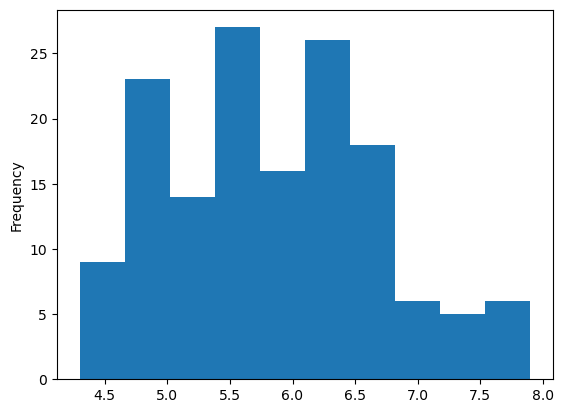

In [242]:
df['SepalLengthCm'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

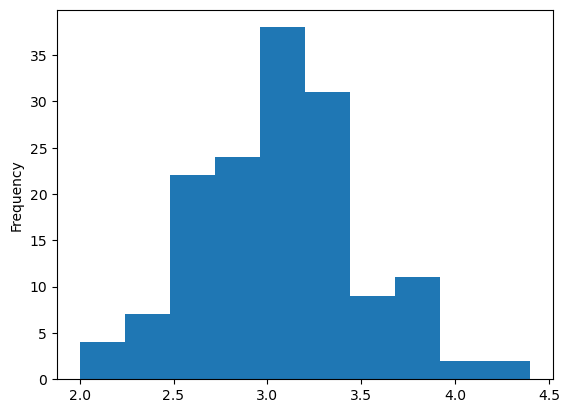

In [244]:
df['SepalWidthCm'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

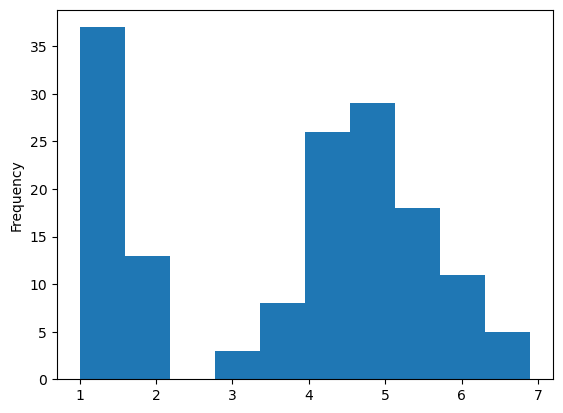

In [246]:
df["PetalLengthCm"].plot(kind = "hist")

### KDE Plot - kernel density estimation plot

<Axes: ylabel='Density'>

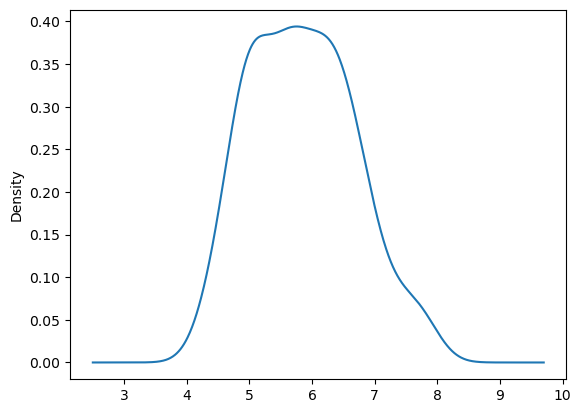

In [249]:
df['SepalLengthCm'].plot(kind = 'kde')

### Box Plot

<Axes: >

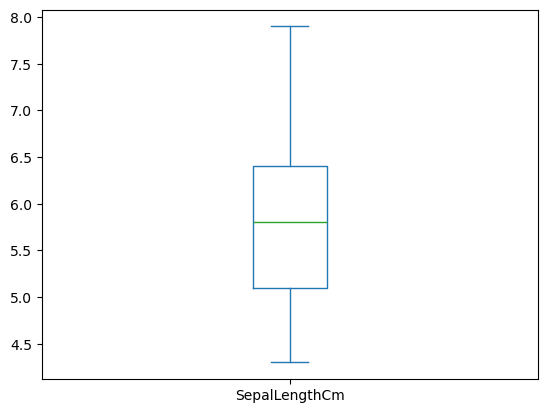

In [252]:
df['SepalLengthCm'].plot(kind = 'box')

### Vertical and Horizontal Bar Plot

<Axes: xlabel='Species'>

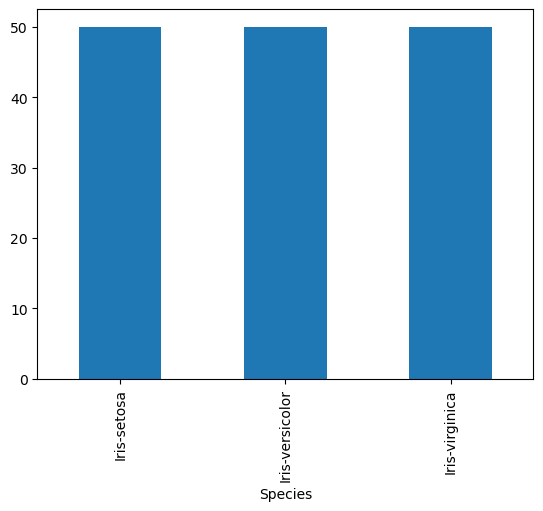

In [255]:
df['Species'].value_counts().plot(kind='bar')

<Axes: ylabel='Species'>

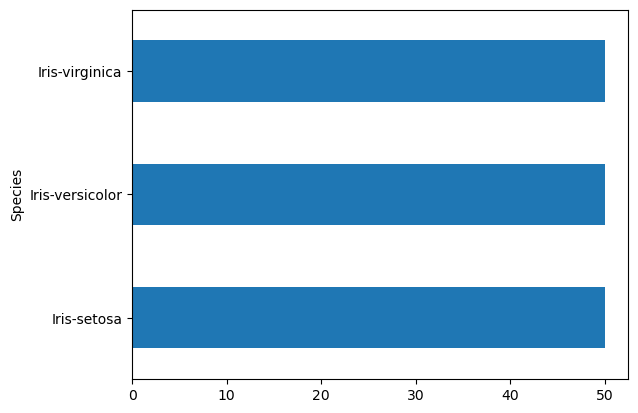

In [257]:
df['Species'].value_counts().plot(kind='barh')

### Scatter Plot

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

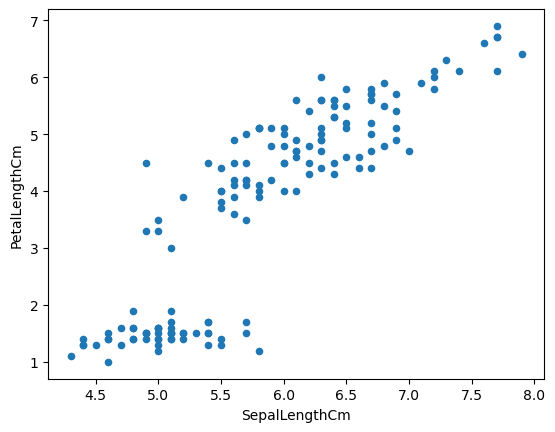

In [260]:
df.plot(x = "SepalLengthCm", y = "PetalLengthCm", kind = 'scatter')